In [2]:
import numpy as np
import cv2
import sys

## 그리기

In [14]:
img = np.ones((600, 1200, 3), dtype=np.uint8) * 255

cv2.line(img, (50, 50), (300, 30), (0, 0, 255), 10)
cv2.arrowedLine(img, (300, 30), (200, 300), (0, 255, 255), 10)
cv2.rectangle(img, (100, 400), (300, 500), (0, 0, 255), -1)
cv2.circle(img, (800, 300), 100, (0, 0, 255), 10, cv2.LINE_AA)
cv2.putText(img, 'Hello python', (800, 100), cv2.FONT_HERSHEY_COMPLEX, 1.5, (255, 0, 0), 2, cv2.LINE_AA)

cv2.imshow('image', img)
cv2.waitKey()

cv2.destroyAllWindows()

## Track Bar

In [18]:
def call_trackbar(pos):
    src[:] = (img / 255) * pos
    cv2.imshow('src', src)
    # print('level = {}'.format(pos))
    
src = cv2.imread('./ch2_fig/fig/puppy.bmp', cv2.IMREAD_GRAYSCALE)

img = src.copy()

cv2.namedWindow('src')
cv2.createTrackbar('level', 'src', 0, 255, call_trackbar)
cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
def call_trackbar(pos):
    img = ((mask / 255.) * pos).astype(np.uint8)
    cv2.imshow('mask', img)
    # print('level = {}'.format(pos))
    
src = cv2.imread('./ch2_fig/fig/imgbin_sunglasses_1.png', cv2.IMREAD_UNCHANGED)

mask = src[:,:,-1].copy()


cv2.namedWindow('mask')
cv2.createTrackbar('level', 'mask', 0, 255, call_trackbar)
cv2.imshow('mask', mask)

cv2.waitKey()
cv2.destroyAllWindows()

## 연산 시간 측정

In [11]:
import time

In [19]:
tm = cv2.TickMeter()
tm.start()

t1 = time.time()

src = cv2.imread('./ch2_fig/fig/puppy.bmp')

for _ in range(100):
    img = cv2.GaussianBlur(src, (0, 0), 5)


tm.stop()
t2 = time.time()

print(f'{tm.getTimeMilli():.4f} ms')
print(f'{(t2 - t1) * 1000:.4f} ms')


284.1040 ms
284.2374 ms


## Scalar 연산

In [21]:
src = cv2.imread('./fig/Lenna.png', cv2.IMREAD_GRAYSCALE)

# dst = np.clip(src + 100., 0, 255).astype(np.uint8)
dst = cv2.add(src, 100)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()

In [24]:
src = cv2.imread('./fig/Lenna.png', cv2.IMREAD_COLOR)

# dst = np.clip(src + 100., 0, 255).astype(np.uint8)
dst = cv2.add(src, (100, 100, 100, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()

## Image 산술연산

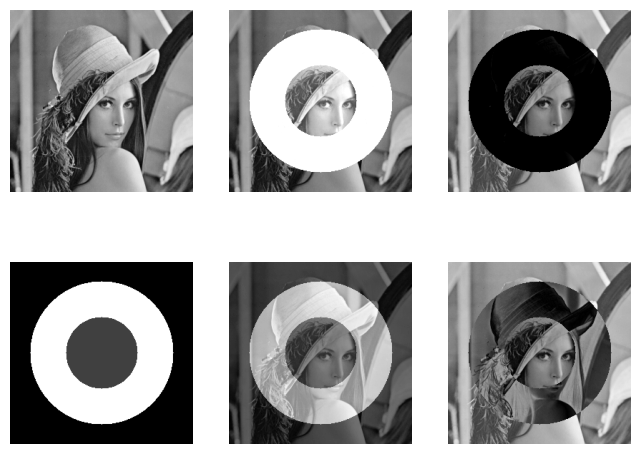

In [44]:
import math
import matplotlib.pyplot as plt

src1 = cv2.imread('./fig/lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros_like(src1, np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

imgs = [src1, src2, dst1, dst2, dst3, dst4]

col = 3
row = math.ceil(len(imgs)/ col)
fig, ax = plt.subplots(row, col, figsize=(8,6))

for i in range(len(imgs)):
    ax[i % row, i // row].imshow(imgs[i], cmap='gray')
    ax[i % row, i // row].axis('off')
    

plt.show()

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

## 영상 비트 연산

In [49]:
src1 = np.zeros((256, 256), np.uint8)
cv2.rectangle(src1, (10, 10), (127, 248), 255, -1)

src2 = np.zeros((256, 256), np.uint8)
cv2.circle(src2, (128, 128), 100, 100, -1)

bit_and = cv2.bitwise_and(src1, src2)
bit_or = cv2.bitwise_or(src1, src2)
bit_xor = cv2.bitwise_xor(src1, src2)
bit_not = cv2.bitwise_not(src1)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('bit_and', bit_and)
cv2.imshow('bit_or', bit_or)
cv2.imshow('bit_xor', bit_xor)
cv2.imshow('bit_not', bit_not)

cv2.waitKey()
cv2.destroyAllWindows()

## 컬러 영상 다루기(RGB 채널)

In [56]:
src = cv2.imread('./fig/flowers.jpg')

b, g, r = cv2.split(src)

img_b = np.zeros_like(src)
img_g = np.zeros_like(src)
img_r = np.zeros_like(src)

img_b[:,:,0] = b
img_g[:,:,1] = g
img_r[:,:,2] = r

print(src.shape, type(src))
print(b.shape, type(b))

dst = img_g.copy()
dst[:,:,0] = r
dst[:,:,2] = b


cv2.imshow('src', src)
# cv2.imshow('b', b)
# cv2.imshow('g', g)
# cv2.imshow('r', r)

cv2.imshow('img_b', img_b)
cv2.imshow('img_g', img_g)
cv2.imshow('img_r', img_r)

cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

(367, 550, 3) <class 'numpy.ndarray'>
(367, 550) <class 'numpy.ndarray'>


## 컬러 영상 다루기 (HSV 채널)

In [60]:
src = cv2.imread('./fig/flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# b, g, r = cv2.split(src)

b = src[:,:,0]
g = src[:,:,1]
r = src[:,:,2]

h, s, v = cv2.split(src_hsv)
v_1 = cv2.add(v, -50)

src_merge = cv2.cvtColor(cv2.merge((h, s, v_1)), cv2.COLOR_HSV2BGR)


print(src.shape, type(src))
print(b.shape, type(b))
print(h.shape, type(h))


cv2.imshow('src', src)

cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)

cv2.imshow('src_merge', src_merge)

cv2.waitKey()
cv2.destroyAllWindows()

(367, 550, 3) <class 'numpy.ndarray'>
(367, 550) <class 'numpy.ndarray'>
(367, 550) <class 'numpy.ndarray'>
